In [50]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

# Thêm thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# Hàm sigmoid
def sigmoid(x):
        return 1/(1+np.exp(-x))
 
   
# Đạo hàm hàm sigmoid
def sigmoid_derivative(x):
        return x*(1-x)

In [24]:
class NeuralNetwork:
    def __init__(self, layers, alpha=0.1):
		# Mô hình layer ví dụ [2,2,1]
      self.layers = layers 
      
      # Hệ số learning rate
      self.alpha = alpha
		
      # Tham số Weight, bias
      self.W = []
      self.b = [] 
      
      # Khởi tạo các tham số ở mỗi layer
      for i in range(0, len(layers)-1):
            w_ = np.random.randn(layers[i], layers[i+1])
            b_ = np.zeros((layers[i+1], 1))
            self.W.append(w_/layers[i])
            self.b.append(b_)
            
    
	# Tóm tắt mô hình neural network
    def __repr__(self):
        return "Neural network [{}]".format("-".join(str(l) for l in self.layers))
    
	
	# Train mô hình với dữ liệu
    def fit_partial(self, x, y):
        A = [x]
    
        # quá trình feedforward
        out = A[-1]
        for i in range(0, len(self.layers) - 1):
            out = sigmoid(np.dot(out, self.W[i]) + (self.b[i].T))
            A.append(out)
        
        # quá trình backpropagation (lan truyền ngược)
        y = y.reshape(-1, 1)
        dA = [-(y/A[-1] - (1-y)/(1-A[-1]))]
        dW = []
        db = []
        for i in reversed(range(0, len(self.layers)-1)):
            dw_ = np.dot((A[i]).T, dA[-1] * sigmoid_derivative(A[i+1]))
            db_ = (np.sum(dA[-1] * sigmoid_derivative(A[i+1]), 0)).reshape(-1,1)
            dA_ = np.dot(dA[-1] * sigmoid_derivative(A[i+1]), self.W[i].T)
            dW.append(dw_)
            db.append(db_)
            dA.append(dA_)
        
        # Đảo ngược dW, db
        dW = dW[::-1]
        db = db[::-1]
        
		# Gradient descent
        for i in range(0, len(self.layers)-1):
            self.W[i] = self.W[i] - self.alpha * dW[i]
            self.b[i] = self.b[i] - self.alpha * db[i]
      
    def fit(self, X, y, epochs=20, verbose=10):
        for epoch in range(0, epochs):
            self.fit_partial(X, y)
            if epoch % verbose == 0:
                loss = self.calculate_loss(X, y)
                print("Epoch {}, loss {}".format(epoch, loss))
    
	# Dự đoán
    def predict(self, X):
        for i in range(0, len(self.layers) - 1):
            X = sigmoid(np.dot(X, self.W[i]) + (self.b[i].T))
        return X

	# Tính loss function
    def calculate_loss(self, X, y):
        y_predict = self.predict(X)
        #return np.sum((y_predict-y)**2)/2
        return -(np.sum(y*np.log(y_predict) + (1-y)*np.log(1-y_predict))) 

In [148]:
def showImage(data):
    X0 = data[data[:,2] == 1, :].reshape(-1, 3)
    X1 = data[data[:,2] == 0, :].reshape(-1, 3)
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = 1)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = 1)
     
    plt.xlabel('Luong')
    plt.ylabel('Gio lam viec')
    plt.show()

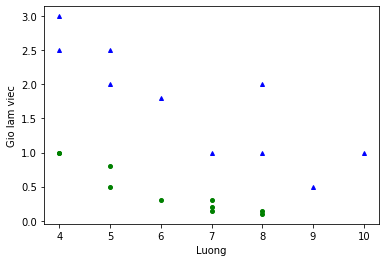

<bound method NeuralNetwork.__repr__ of Neural network [2-5-5-1]>
Epoch 0, loss 13.86316181539441
Epoch 100, loss 13.469913206435333
Epoch 200, loss 9.813230446952444
Epoch 300, loss 11.765034003298807
Epoch 400, loss 9.003099090752366
Epoch 500, loss 10.435110658653505
Epoch 600, loss 6.254665034385104
Epoch 700, loss 9.421787008134087
Epoch 800, loss 5.9703765706964464
Epoch 900, loss 5.967141370658258
Epoch 1000, loss 5.775935911746633
Epoch 1100, loss 20.052913624161857
Epoch 1200, loss 9.06077320798747
Epoch 1300, loss 8.384372901372044
Epoch 1400, loss 8.625624125501623
Epoch 1500, loss 13.135096972838163
Epoch 1600, loss 0.21174354362869852
Epoch 1700, loss 0.08475930303679644
Epoch 1800, loss 0.04431263435188197
Epoch 1900, loss 0.028567734243078406
Epoch 2000, loss 0.021092527592729015
Epoch 2100, loss 0.016850737794763173
Epoch 2200, loss 0.014126081776936335
Epoch 2300, loss 0.012221659831668475
Epoch 2400, loss 0.010808986436254964
Epoch 2500, loss 0.009714540471989145
Epoc

In [155]:
# Dataset bài 2
data = pd.read_csv('./nn/dataset.csv').values
N, d = data.shape
X = data[:, 0:d-1].reshape(-1, d-1)
y = data[:, 2].reshape(-1, 1)
showImage(data)

p = NeuralNetwork([X.shape[1], 5, 5, 1], 0.1)
print(p.__repr__)
p.fit(X, y, 10000, 100)

In [156]:
X_predict = np.array([6,1])
print('Gia tri du doan: '+str(p.predict(X_predict)))

Gia tri du doan: [[0.9981165]]


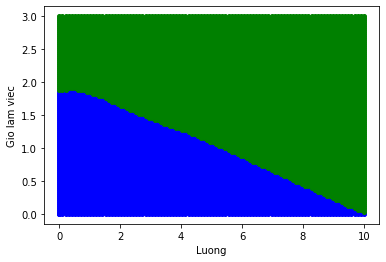

In [157]:
xx0 = np.linspace(0,10,100).reshape(-1,1)
xx1 = np.linspace(0,3,100).reshape(-1,1)
XX = np.array([[0,0,0]])
for i in range(100):
    xx = np.concatenate((np.ones(100).reshape(-1,1)*xx0[i], xx1), axis=1)
    XX_temp = np.concatenate((xx, np.zeros(xx0.shape[0]).reshape(-1,1)), axis=1)
    XX = np.concatenate((XX_temp,XX), axis=0)
for i in range(XX.shape[0]):
    XX[:, 2][i] = p.predict(XX[:,0:2][i])

X0 = XX[np.where(XX[:,2] < 0.5), 0:2].reshape(-1,2)
X1 = XX[np.where(XX[:,2] >= 0.5), 0:2].reshape(-1, 2)
plt.plot(X0[:, 0], X0[:, 1], 'bo', markersize = 4, alpha = 1)
plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = 1)
    
plt.xlabel('Luong')
plt.ylabel('Gio lam viec')
plt.show()